#### Hannah M. Padgette
##### Mathematical & Computational Modeling of Infectious Diseases
##### D.B. Larremore
##### Homework 1 - due 2 Feb 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

__Problem 1__ - The goal of this problem is to get you over any barriers with (i) getting Python set up, (ii), getting the SIR model implemented in a Forward Euler solver, and (iii) getting matplotlib set up.

Write a function in Python that uses the Forward Euler method to simulate the SIR model. Check your work by first reproducing the three plots from Figure 1 of the Week 2 lecture notes. The parameters are: $N = 1000$, $I_0 = 1$, $S_0 = 999$, with:
* $\beta = 1$, $\gamma = 0.5$
* $\beta = 1.5$, $\gamma = 0.5$
* $\beta = 2$, $\gamma = 0.5$

Show that your code works by simply reproducing the plots exactly, but with your first name included in the legend labels, e.g. “S Dan”, “I Dan” or something. Link to your code and turn in just the 3 plots.


In [2]:
def SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma):

    n = int((tf-t0)/delta_t+1) # count the number of timepoints
    t = np.linspace(t0,tf,n)   # create a time vector 

    S = np.zeros(n)            # initialize a vector for the solution of dS/dt -> S(t)
    I = np.zeros(n)            # initialize a vector for the solution of dI/dt -> I(t)
    R = np.zeros(n)            # initialize a vector for the solution of dR/dt -> R(t)

    S[0]=S0 # define the first point in S(t)
    I[0]=I0 # define the first point in I(t)
    R[0]=R0 # define the first point in R(t)

    for i in range(1,len(t)): # loop thru each solution vector starting at index 1 
        S[i] = S[i-1] + delta_t * (-beta*S[i-1]*I[i-1]/N)
        I[i] = I[i-1] + delta_t * (beta*S[i-1]*I[i-1]/N - gamma*I[i-1])
        R[i] = R[i-1] + delta_t * (gamma*I[i-1])

    return(S,I,R,t)

In [3]:
N = 1000
S0 = 999
I0 = 1
R0 = N-S0-I0 # initial population of recovered individuals 
t0 = 0
tf = 50
delta_t = 0.1

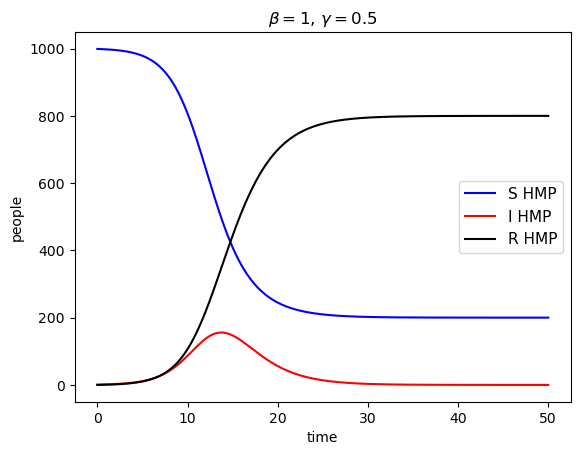

In [4]:
# plot 1
beta=1
gamma=0.5
S,I,R,t = SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma) # R0 here is the initial population of recovered individuals 

fig, ax = plt.subplots()
ax.plot(t,S,color='b', label='S HMP')
ax.plot(t,I,color='r', label='I HMP')
ax.plot(t,R,color='k', label='R HMP')
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$\beta=1$, $\gamma=0.5$')

plt.savefig("HPadgette_CSCI7000_HW1_SIR_beta1_gamma0p5.png", bbox_inches="tight", dpi=300)

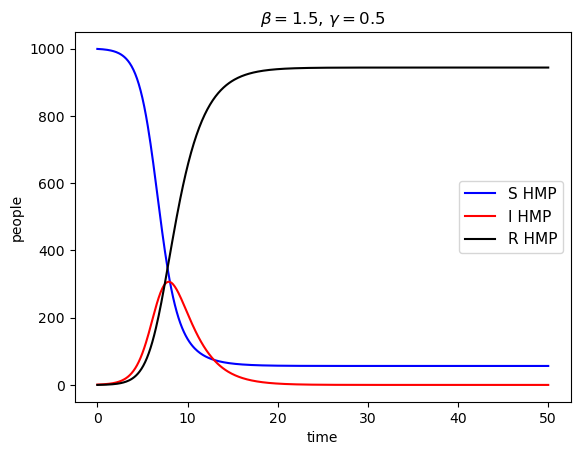

In [5]:
# plot 2
beta=1.5
gamma=0.5
S,I,R,t = SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma)

fig, ax = plt.subplots()
ax.plot(t,S,color='b', label='S HMP')
ax.plot(t,I,color='r', label='I HMP')
ax.plot(t,R,color='k', label='R HMP')
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$\beta=1.5$, $\gamma=0.5$')

plt.savefig("HPadgette_CSCI7000_HW1_SIR_beta1p5_gamma0p5.png", bbox_inches="tight", dpi=300)

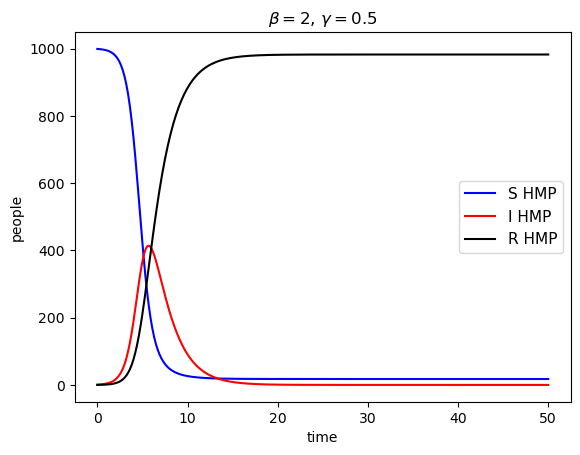

In [6]:
# plot 3
beta=2
gamma=0.5
S,I,R,t = SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma)

fig, ax = plt.subplots()
ax.plot(t,S,color='b', label='S HMP')
ax.plot(t,I,color='r', label='I HMP')
ax.plot(t,R,color='k', label='R HMP')
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$\beta=2$, $\gamma=0.5$')

plt.savefig("HPadgette_CSCI7000_HW1_SIR_beta2_gamma0p5.png", bbox_inches="tight", dpi=300)

__Problem 3__ - Recall that $r_\infty=1-e^{R_0r_\infty}$. Though we can’t solve this equation, we can use a valuable graphical technique: if we set $f(r_\infty)=r_\infty$ and $g(r_\infty)=1-e^{-R_0r_\infty}$, we can plot both $f(r_\infty)$ vs. $r_\infty$ and $g(r_\infty)$ vs. $r_\infty$, and see where $f=g$. Create four plots for $R_0 \in \{0.9, 1.0, 1.1, 1.2\}$ with f in black and g in red. Use the fsolve function to find the intersection point, and use matplotlib’s scatter function to plot a blue circle at the intersection.

In [7]:
def f(r,R_0):
    return r

def g(r,R_0):
    return (1-np.exp(-R_0*r))

def func(r,R_0):
    # f(r) = r
    # g(r) = 1-e^(-R_0^r)
    # returns the different b/w f(r) and g(r)
    
    return r - (1-np.exp(-R_0*r))

def rootFinder(r,R0):
    f_r = f(r,R0)
    g_r = g(r,R0)
    root = optimize.fsolve(func,1,args=(R0))
    return f_r,g_r,root 

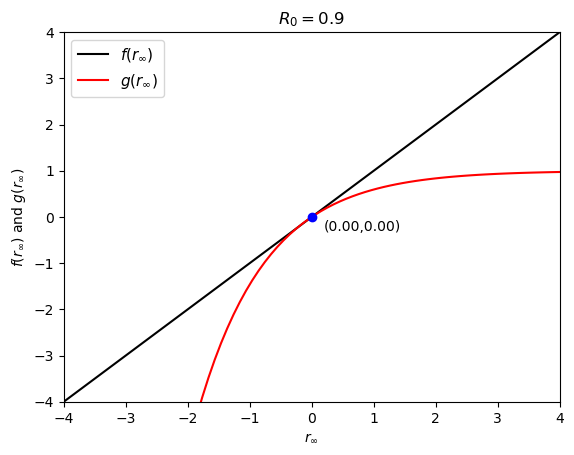

In [8]:
r = np.linspace(-5,5,100)
R0 = 0.9

f1,g1,root1 = rootFinder(r,R0)

fig, ax = plt.subplots()
ax.plot(r,f1,color='k', label=r'$f(r_\infty)$',zorder=1)
ax.plot(r,g1,color='r', label=r'$g(r_\infty)$',zorder=1)
ax.scatter(root1,f(root1,R0),color='b',zorder=3)
ax.annotate(f'({root1[0]:.2f},{f(root1,R0)[0]:.2f})',(root1,f(root1,R0)),xytext=(0.2,-0.3))

ax.set_xlabel(r'$r_\infty$')
ax.set_ylabel(r'$f(r_\infty)$ and $g(r_\infty)$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
plt.legend(loc='upper left',fontsize=11)
plt.title(f'$R_0={R0}$')

plt.savefig("HPadgette_CSCI7000_HW1_prob3b_R0_0p9.png", bbox_inches="tight", dpi=300)

/Users/hapa3524/anaconda3/envs/csci7000/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


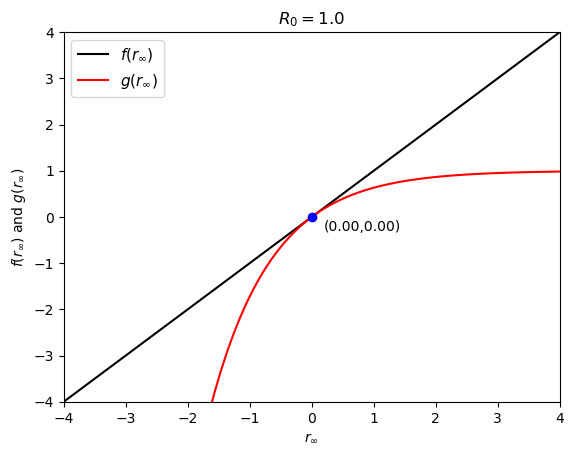

In [9]:
r = np.linspace(-5,5,100)
R0 = 1.0

f2,g2,root2 = rootFinder(r,R0)

fig, ax = plt.subplots()
ax.plot(r,f2,color='k', label=r'$f(r_\infty)$',zorder=1)
ax.plot(r,g2,color='r', label=r'$g(r_\infty)$',zorder=1)
ax.scatter(root2,f(root2,R0),color='b',zorder=3)
ax.annotate(f'({root2[0]:.2f},{f(root2,R0)[0]:.2f})',(root2,f(root2,R0)),xytext=(0.2,-0.3))

ax.set_xlabel(r'$r_\infty$')
ax.set_ylabel(r'$f(r_\infty)$ and $g(r_\infty)$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
plt.legend(loc='upper left',fontsize=11)
plt.title(f'$R_0={R0}$')

plt.savefig("HPadgette_CSCI7000_HW1_prob3b_R0_1.png", bbox_inches="tight", dpi=300)

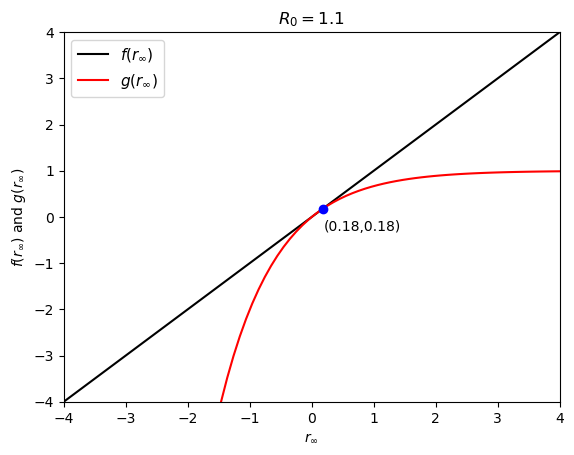

In [10]:
r = np.linspace(-5,5,100)
R0 = 1.1

f3,g3,root3 = rootFinder(r,R0)

fig, ax = plt.subplots()
ax.plot(r,f3,color='k', label=r'$f(r_\infty)$',zorder=1)
ax.plot(r,g3,color='r', label=r'$g(r_\infty)$',zorder=1)
ax.scatter(root3,f(root3,R0),color='b',zorder=3)
ax.annotate(f'({root3[0]:.2f},{f(root3,R0)[0]:.2f})',(root3,f(root3,R0)),xytext=(0.2,-0.3))

ax.set_xlabel(r'$r_\infty$')
ax.set_ylabel(r'$f(r_\infty)$ and $g(r_\infty)$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
plt.legend(loc='upper left',fontsize=11)
plt.title(f'$R_0={R0}$')

plt.savefig("HPadgette_CSCI7000_HW1_prob3b_R0_1p1.png", bbox_inches="tight", dpi=300)

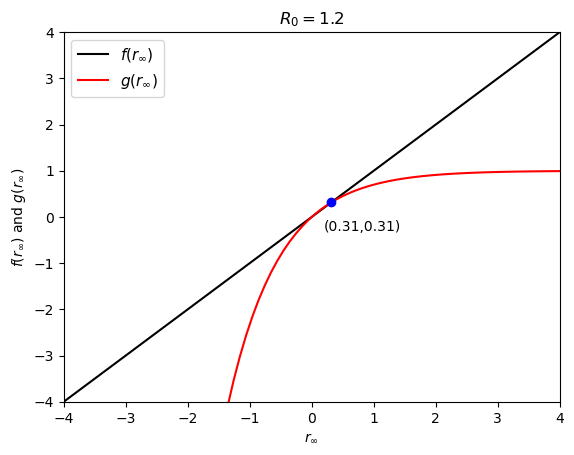

In [11]:
r = np.linspace(-5,5,100)
R0 = 1.2

f4,g4,root4 = rootFinder(r,R0)

fig, ax = plt.subplots()
ax.plot(r,f4,color='k', label=r'$f(r_\infty)$',zorder=1)
ax.plot(r,g4,color='r', label=r'$g(r_\infty)$',zorder=1)
ax.scatter(root4,f(root4,R0),color='b',zorder=3)
ax.annotate(f'({root4[0]:.2f},{f(root4,R0)[0]:.2f})',(root4,f(root4,R0)),xytext=(0.2,-0.3))

ax.set_xlabel(r'$r_\infty$')
ax.set_ylabel(r'$f(r_\infty)$ and $g(r_\infty)$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
plt.legend(loc='upper left',fontsize=11)
plt.title(f'$R_0={R0}$')

plt.savefig("HPadgette_CSCI7000_HW1_prob3b_R0_1p2.png", bbox_inches="tight", dpi=300)

*Part c* - Comment on what you see in the plots in the context of what we have learned about $R_0$. What do you see in your figures? What happens when $R_0<1$ ?

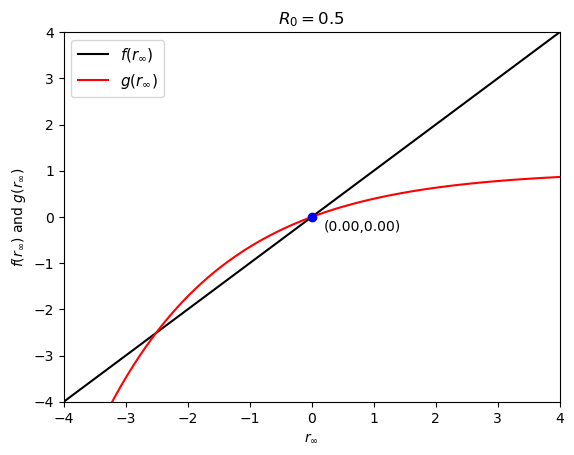

In [12]:
r = np.linspace(-5,5,100)
R0 = 0.5

f5,g5,root5 = rootFinder(r,R0)

fig, ax = plt.subplots()
ax.plot(r,f5,color='k', label=r'$f(r_\infty)$',zorder=1)
ax.plot(r,g5,color='r', label=r'$g(r_\infty)$',zorder=1)
ax.scatter(root5,f(root5,R0),color='b',zorder=3)
ax.annotate(f'({root5[0]:.2f},{f(root5,R0)[0]:.2f})',(root5,f(root5,R0)),xytext=(0.2,-0.3))

ax.set_xlabel(r'$r_\infty$')
ax.set_ylabel(r'$f(r_\infty)$ and $g(r_\infty)$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
plt.legend(loc='upper left',fontsize=11)
plt.title(f'$R_0={R0}$')

plt.savefig("HPadgette_CSCI7000_HW1_prob3b_R0_0p5.png", bbox_inches="tight", dpi=300)

*Part d* - Finally, test the predictions made by this final-size equation by using your SIR code and $\beta = 1$, $\gamma = 0.5$ by creating a new version of that epidemic with a green dotted line at the height of $r_\infty$. Does this final size prediction work?


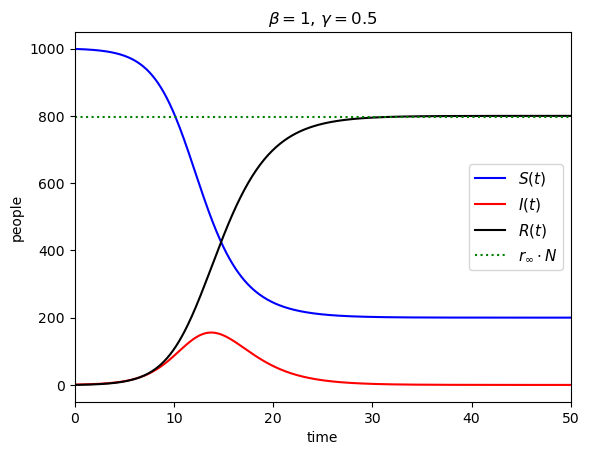

In [13]:
beta=1
gamma=0.5

N=1000
I0 = 1
S0 = 999
R0 = N-I0-S0 # initial population of recovered individuals (not the basic reproductive number)
t0 = 0
tf = 50
delta_t = 0.1

r = np.linspace(-5,5,100)
R_0 = beta / gamma # basic reproductive number; by definition - see lecture 3 notes

S,I,R,t = SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma)
f6,g6,root6 = rootFinder(r,R_0) # root 6 is r_inf in terms of fraction of the total pop -> mult by N to get # of individuals

fig, ax = plt.subplots()
ax.plot(t,S,color='b', label=f'$S(t)$')
ax.plot(t,I,color='r', label=f'$I(t)$')
ax.plot(t,R,color='k', label=f'$R(t)$')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.set_xlim(0,50)
ax.axhline(y=root6*N,color='g',linestyle=':',label=f'$r_\infty \cdot N$')

plt.legend(loc='center right',fontsize=11)
plt.title(r'$\beta=1$, $\gamma=0.5$')

plt.savefig("HPadgette_CSCI7000_HW1_prob3d.png", bbox_inches="tight", dpi=300)

__Problem 4__ - (Grad / EC): In class, we showed that the SIR model’s disease-free equilibrium is stable when $s<\frac{1}{R_0}$ and unstable otherwise. Using $N = 106$, and $\varepsilon = \frac{1}{N}$ as your perturbation, produce a single figure using your simulation code and its output that illustrates this point. Write a caption that explains the principle of stability, and explain how your figure illustrates it


Text(0.5, 1.0, '$I(t)$ vs. $t$: $\\beta=1$, $\\gamma=0.5$')

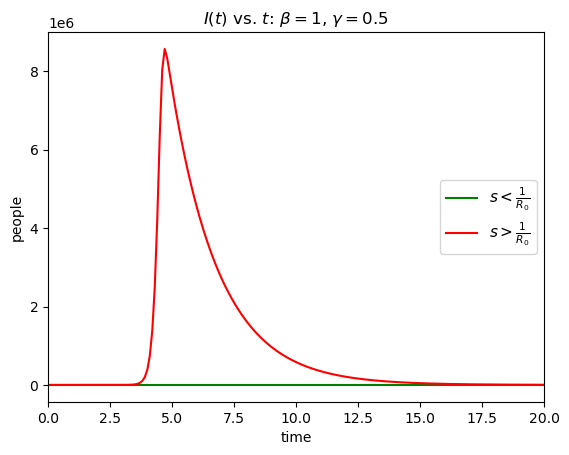

In [14]:
N = 10**6
beta=1
gamma=0.5
I0 = 1/N # epsilon
t0 = 0
tf = 20
delta_t = 0.1

# s < 1/R_0 --> S < N/R_0
S0 = 10**4
R0 = N-S0-I0 # initial population of recovered individuals 
S1,I1,R1,t1 = SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma) # R0 here is the initial population of recovered individuals 

# s > 1/R_0 --> S > N/R_0
S0 = 10**7
R0 = N-S0-I0 # initial population of recovered individuals 
S2,I2,R2,t2 = SIR(N,S0,I0,R0,t0,tf,delta_t,beta,gamma) # R0 here is the initial population of recovered individuals 

fig, ax = plt.subplots()
ax.plot(t1,I1,color='g', label=r'$s < \frac{1}{R_0}$')
ax.plot(t2,I2,color='r', label=r'$s > \frac{1}{R_0}$')
ax.set_xlabel('time')
ax.set_ylabel('people')
plt.legend(loc='center right',fontsize=11)
# ax.set_ylim(0,1*10**(-6))
ax.set_xlim(0,20)
plt.title(r'$I(t)$ vs. $t$: $\beta=1$, $\gamma=0.5$')

# plt.savefig("HPadgette_CSCI7000_HW1_prob4_2.png", bbox_inches="tight", dpi=300)

In [15]:
! open .